In [ ]:
import pandas as pd
import itertools
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import time

In [ ]:
X_train = pd.read_csv ('/content/drive/MyDrive/dataset/new dataset/duplicated/OneHotEncoder_scaled_train.csv')
X_test = pd.read_csv ('/content/drive/MyDrive/dataset/new dataset/duplicated/OneHotEncoder_scaled_test.csv')
Y_train = pd.read_csv ('/content/drive/MyDrive/dataset/new dataset/duplicated/Y_train.csv')
Y_test = pd.read_csv ('/content/drive/MyDrive/dataset/new dataset/duplicated/Y_test.csv')

X_train = X_train[['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'count',
      'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
      'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
      'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
      'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
      'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
      'dst_host_serror_rate', 'dst_host_srv_serror_rate',
          'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
          'Protocole_type_icmp', 'Protocole_type_tcp', 'Protocole_type_udp',
          'service_type_domain_u', 'service_type_eco_i', 'service_type_http',
          'service_type_private', 'service_type_smtp', 'flag_type_RSTR',
          'flag_type_S0', 'flag_type_SF']]



#test
X_test = X_test[['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'count',
      'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
      'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
      'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
      'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
      'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
      'dst_host_serror_rate', 'dst_host_srv_serror_rate',
      'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
      'Protocole_type_icmp', 'Protocole_type_tcp', 'Protocole_type_udp',
      'service_type_domain_u', 'service_type_eco_i', 'service_type_http',
      'service_type_private', 'service_type_smtp', 'flag_type_RSTR',
      'flag_type_S0', 'flag_type_SF']]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
enc = OneHotEncoder()#instanciation
Y_train = enc.fit_transform(Y_train)
Y_train = pd.DataFrame(Y_train.toarray(), columns = ['Dos','normal','probe','r2l','u2r'])

enc = OneHotEncoder()#instanciation
Y_test = enc.fit_transform(Y_test)
Y_test = pd.DataFrame(Y_test.toarray(), columns = ['Dos','normal','probe','r2l','u2r'])

construction du modéle ...
------  modéle d'apprentissage  --------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1152      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
______________________________________________________

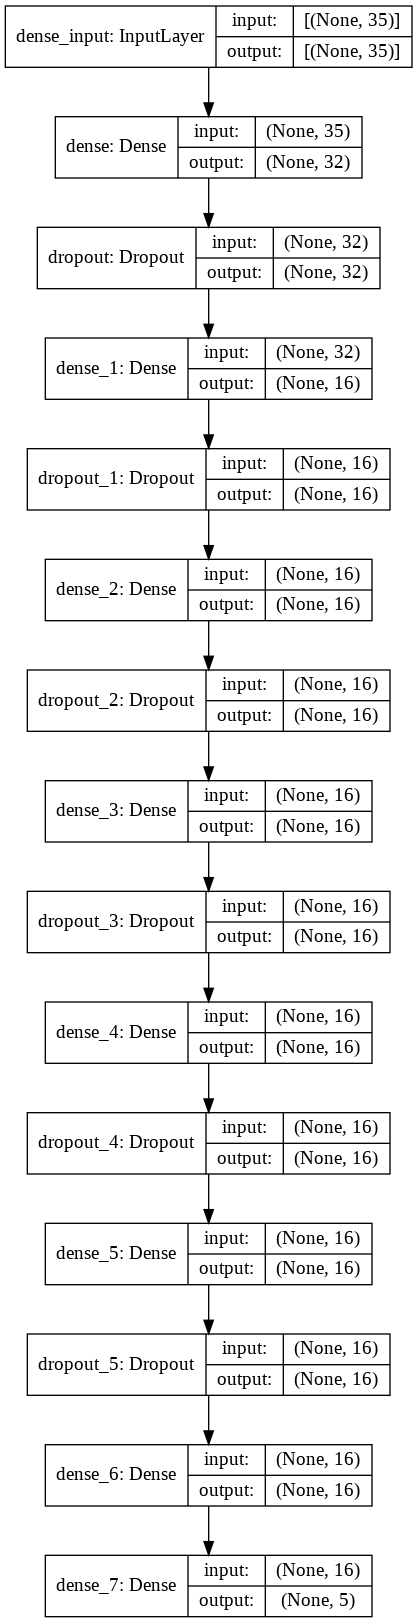

In [ ]:
print("construction du modéle ...")

model = Sequential()
model.add(Dense(32, input_dim = 35, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))
print("------  modéle d'apprentissage  --------")

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
 print("------  cross validation (stratified K-Fold)  --------")

model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

X = X_train
Y = Y_train
X = X.to_numpy()
Y = Y.to_numpy()

predicted_targets = np.array([])
actual_targets = np.array([])
accuracies_array = np.array([])
skf = StratifiedKFold(n_splits = 10, shuffle=True, random_state=200)

#cross validation

for i,(train_index, test_index) in enumerate(skf.split(X, Y.argmax(1))):
  print("Fold {} ...".format(i))
  X_train_temp, X_test_temp = X[train_index], X[test_index]
  Y_train_temp, Y_test_temp = Y[train_index], Y[test_index]

  start_training_time = time.time()
  model.fit(X_train_temp, Y_train_temp, epochs = 5, verbose = 0, batch_size=32)
  print("temps d'apprentissage du fold {} = {:.3f} Secondes".format(i,time.time() - start_training_time))
  accuracy = model.evaluate(X_test_temp,Y_test_temp,verbose=0)
  print("exactitude de fold {} = {} ".format(i,accuracy[1]))
  predicted_labels = model.predict(X_test_temp)
  predicted_labels = np.argmax(predicted_labels, axis=1)
  Y_test_temp = np.argmax(Y_test_temp, axis=1)

  accuracies_array = np.append(accuracies_array, accuracy[1])
  predicted_targets = np.append(predicted_targets, predicted_labels)
  actual_targets = np.append(actual_targets, Y_test_temp)

------  cross validation (stratified K-Fold)  --------
Fold 0 ...


KeyboardInterrupt: ignored

In [ ]:
"""plt1 = plt.figure(1)
plt.plot(history.history['accuracy'])
plt.xlabel("itérations (epochs)")
plt.ylabel("exactitude")
plt.legend(['exactitude'], loc="upper left")
plt.show()
plt2 = plt.figure(2)
plt.plot(history.history['loss'], color = 'orange')
plt.xlabel("itérations (epochs)")
plt.ylabel("coût")
plt.legend(['fonction du coût'], loc="down left")
plt.show()"""

In [ ]:
#génération de matrice de confusion de l'entrainement (non normalisé)
confus_mat = confusion_matrix(actual_targets, predicted_targets)
plt.figure()
plt.imshow(confus_mat, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("matrice de confusion non normalisé")

classes = ['Dos','normal','probe','r2l','u2r']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes, rotation=45)

thresh = confus_mat.max() / 2
for i, j in itertools.product(range(confus_mat.shape[0]), range(confus_mat.shape[1])):
        plt.text(j, i, format(confus_mat[i, j], 'd'), horizontalalignment="center",color="white" if confus_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(accuracies_array)
print(accuracies_array.mean())

In [ ]:
#génération de matrice de confusion de l'entrainement (normalisé)
confus_mat = confusion_matrix(actual_targets, predicted_targets)
confus_mat = confus_mat.astype('float') / confus_mat.sum(axis=1)[:, np.newaxis]
plt.figure()
plt.imshow(confus_mat, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("matrice de confusion normalisé")

classes = ['Dos','normal','probe','r2l','u2r']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes, rotation=45)

thresh = confus_mat.max() / 2
for i, j in itertools.product(range(confus_mat.shape[0]), range(confus_mat.shape[1])):
        plt.text(j, i, format(confus_mat[i, j], '.4f'), horizontalalignment="center",color="white" if confus_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(accuracies_array)
print("accuracy minimale du modéle {}".format(min(accuracies_array)))
print("accuracy maximale du modéle {}".format(max(accuracies_array)))
print("accuracy moyenne du modéle {}".format(accuracies_array.mean()))
#génération des métriques
print(classification_report(actual_targets,predicted_targets))

In [ ]:
print("---------- test ----------")
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()
predicted_targets = model.predict(X_test,verbose=1)
loss, accuracy = model.evaluate(X_test,Y_test,verbose=1)
actual_targets = Y_test
actual_targets = np.argmax(actual_targets, axis=1)
predicted_targets = np.argmax(predicted_targets, axis=1)
print("Loss : {} Accuracy : {}".format(loss,accuracy))

In [ ]:
#génération de matrice de confusion de test (normalisé)
confus_mat = confusion_matrix(actual_targets, predicted_targets)
confus_mat = confus_mat.astype('float') / confus_mat.sum(axis=1)[:, np.newaxis]
plt.figure()
plt.imshow(confus_mat, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("matrice de confusion normalisé")

classes = ['Dos','normal','probe','r2l','u2r']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes, rotation=45)

thresh = confus_mat.max() / 2
for i, j in itertools.product(range(confus_mat.shape[0]), range(confus_mat.shape[1])):
        plt.text(j, i, format(confus_mat[i, j], '.4f'), horizontalalignment="center",color="white" if confus_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(accuracies_array)
print("accuracy minimale du modéle {}".format(min(accuracies_array)))
print("accuracy maximale du modéle {}".format(max(accuracies_array)))
print("accuracy moyenne du modéle {}".format(accuracies_array.mean()))
#génération des métriques
print(classification_report(actual_targets,predicted_targets))

In [ ]:
#génération de matrice de confusion de test (non normalisé)
confus_mat = confusion_matrix(actual_targets, predicted_targets)
plt.figure()
plt.imshow(confus_mat, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("matrice de confusion non normalisé")

classes = ['Dos','normal','probe','r2l','u2r']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes, rotation=45)

thresh = confus_mat.max() / 2
for i, j in itertools.product(range(confus_mat.shape[0]), range(confus_mat.shape[1])):
        plt.text(j, i, format(confus_mat[i, j], 'd'), horizontalalignment="center",color="white" if confus_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()